### LINEAR REGRESSION MODEL FOR ROAD ACCIDENT SEVERITY 

**This is what I use for subtitles ....of you can just add the number of hashes ....the max is 6 similar to h6 in html**

#### The work flow 

**1. import the libraries that we will use &&  Load the data set**

Libraries => Pandas, matplotlib, scikit-learn

**2.Visualize the data**

-> We can use the functions into() describe() or get to plot some graphs,pie chart for the same
 
**3.Data preparation...**

-> Check for the columns that are unwanted 

-> Check for any column with missing values and either decide to remove it / replace the null values 

->label encoding 

->Split the data to x and y

    -> dependent variable - variable to predict => Accident Severity

    -> independet vairables - the ones to use to predict (Road_surface_type,Number_of_vehicles_involved,

 Number_of_casualties,)

**4. Creating/building the model**

**5. Train the model**

**6.Test the model**

-> Test Hypothesis which one is supposed to test using the model ...(Depends on a person ....not a must they be similar)

->Weather condition - Do most accidents occur on rainy or normal weather conditions?

-> Road surface typs - which roads experience high number of accidents?

-> Vehicle driver relationship - are most drivers involved in accidents owners or employees to the vehicles.



#### LOADING THE DATA

In [24]:
import pandas as pd 
#Loading the data set
df = pd.read_csv('road_accident_Severity_dataset.csv')

df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


#### Visualizing the data

In [25]:
df.info()
df.describe()
print('Data shape\n',df.shape)
print('Data size\n', df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [26]:
import matplotlib.pyplot as plt 
import plotly.express as px

#Pie chart for Accident severity and Number of casualties
px.pie(df,df['Accident_severity'],df['Number_of_casualties'],color='Accident_severity',template='plotly_dark',hole=0.4)


In [27]:
#Histogram for Number of casualties against Road Surface Type
px.histogram(df,df['Road_surface_type'], df['Number_of_casualties'], color='Road_surface_type', template='plotly_dark')

In [28]:
#Histogram for road surface conditions against number of casualties 
px.histogram(df,df['Road_surface_conditions'], df['Number_of_casualties'],color='Road_surface_conditions', template='plotly_dark')

#### Data Preparation

-removing unwanted columns 

-replacing null values.

In [29]:
#Getting rid of unwanted columns :)
df.drop(['Time','Day_of_week','Age_band_of_driver','Sex_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience',
'Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment',
'Types_of_Junction','Light_conditions','Type_of_collision','Vehicle_movement',
'Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Pedestrian_movement','Cause_of_accident','Work_of_casuality',
'Fitness_of_casuality'], axis=1, inplace=True)

df

,Road_surface_type,Road_surface_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
0,Asphalt roads,Dry,Normal,2,2,Slight Injury
1,Asphalt roads,Dry,Normal,2,2,Slight Injury
2,Asphalt roads,Dry,Normal,2,2,Serious Injury
3,Earth roads,Dry,Normal,2,2,Slight Injury
4,Asphalt roads,Dry,Normal,2,2,Slight Injury
...,...,...,...,...,...,...
12311,Asphalt roads,Dry,Normal,2,1,Slight Injury
12312,Asphalt roads,Dry,Normal,2,1,Slight Injury
12313,Asphalt roads,Dry,Normal,1,1,Serious Injury
12314,Asphalt roads,Dry,Normal,2,1,Slight Injury


In [30]:
#Checking for null values in columns 
columns_null_values1 = df.isnull().sum()
print('Columns and thier null values:\n', columns_null_values1)

Columns and thier null values:
 Road_surface_type              172
Road_surface_conditions          0
Weather_conditions               0
Number_of_vehicles_involved      0
Number_of_casualties             0
Accident_severity                0
dtype: int64


In [31]:
new_df = df.fillna('na')

#checking if all null values have been replaced:
columns_null_values2 = new_df.isnull().sum()
print('Columns with null values:\n', columns_null_values2)

Columns with null values:
 Road_surface_type              0
Road_surface_conditions        0
Weather_conditions             0
Number_of_vehicles_involved    0
Number_of_casualties           0
Accident_severity              0
dtype: int64


In [32]:
#printing the fisrt 30 rows:
new_df.head(30)

,Road_surface_type,Road_surface_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
0,Asphalt roads,Dry,Normal,2,2,Slight Injury
1,Asphalt roads,Dry,Normal,2,2,Slight Injury
2,Asphalt roads,Dry,Normal,2,2,Serious Injury
3,Earth roads,Dry,Normal,2,2,Slight Injury
4,Asphalt roads,Dry,Normal,2,2,Slight Injury
5,na,Dry,Normal,1,1,Slight Injury
6,na,Dry,Normal,1,1,Slight Injury
7,Asphalt roads,Dry,Normal,2,1,Slight Injury
8,Earth roads,Dry,Normal,2,1,Slight Injury
9,Asphalt roads,Dry,Normal,2,1,Serious Injury


In [33]:
# LABEL ENCODING - This is to allow the model to work with string values.
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in new_df.columns:
    if new_df[col].dtype == object:
        new_df[col] = l.fit_transform(new_df[col])
print('Endoded Data:')
new_df.head(30)

Endoded Data:


,Road_surface_type,Road_surface_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
0,0,0,2,2,2,2
1,0,0,2,2,2,2
2,0,0,2,2,2,1
3,2,0,2,2,2,2
4,0,0,2,2,2,2
5,5,0,2,1,1,2
6,5,0,2,1,1,2
7,0,0,2,2,1,2
8,2,0,2,2,1,2
9,0,0,2,2,1,1


In [34]:
#DATA SPLITTING
X = new_df.drop('Accident_severity', axis=1)
X

,Road_surface_type,Road_surface_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties
0,0,0,2,2,2
1,0,0,2,2,2
2,0,0,2,2,2
3,2,0,2,2,2
4,0,0,2,2,2
...,...,...,...,...,...
12311,0,0,2,2,1
12312,0,0,2,2,1
12313,0,0,2,1,1
12314,0,0,2,2,1


In [35]:
y = new_df['Accident_severity']
y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int32

#### CREATING THE MODEL 

In [36]:
from sklearn.model_selection import train_test_split
#Random state - a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

X_train

,Road_surface_type,Road_surface_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties
6013,0,0,2,2,1
10050,0,0,2,3,5
9346,0,0,2,1,1
8724,0,0,2,2,1
11295,0,0,2,2,1
...,...,...,...,...,...
79,0,0,2,2,1
12119,0,0,2,2,1
8039,0,3,2,2,1
6936,0,0,2,2,1


In [37]:
X_test

,Road_surface_type,Road_surface_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties
9498,0,3,4,1,1
3270,0,0,2,2,1
7914,0,0,2,2,1
9659,0,0,2,2,1
5206,0,0,2,2,3
...,...,...,...,...,...
9772,5,0,2,2,1
4776,0,0,2,1,2
8241,0,0,2,2,3
11358,0,0,0,2,2


In [38]:
#The model...
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Training the model 

In [39]:
#Prediction
y_train_pred = lr.predict(X_train) 
y_test_pred = lr.predict(X_test)

#### Testing the model 

In [40]:
y_train_pred

array([1.83868227, 1.78626084, 1.77192857, ..., 1.84375764, 1.83868227,
       1.84375764])

In [41]:
y_test_pred

array([1.78854424, 1.83868227, 1.83868227, ..., 1.7790947 , 1.79734818,
       1.94577946])

#### Evaluating the model 

In [42]:
#mse = is used to check how close the estimates are to the actual values. 
from sklearn.metrics import mean_squared_error

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)

In [43]:
#MSE output
print(f'LR MSE (Train):{lr_train_mse:.3f}')
print(f'LR MSE (Test): {lr_test_mse:.3f}')


LR MSE (Train):0.167
LR MSE (Test): 0.146


Text(0.5, 0, 'Experimental Data')

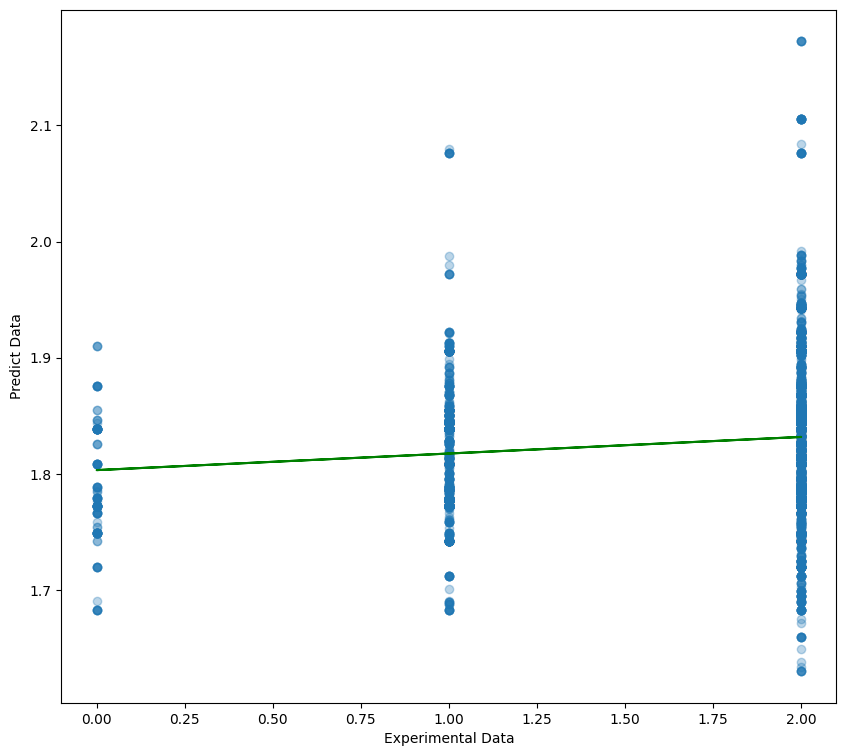

In [44]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure(figsize=(10,9))
plt.scatter(x=y_train, y=y_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'Green')
plt.ylabel('Predict Data')
plt.xlabel('Experimental Data')